# 📊 Análisis Exploratorio de Datos
## Trabajo Final - Inteligencia de Negocios 2025

**Maestría en Economía Aplicada - UBA**  
**Dataset:** Publicaciones de venta de inmuebles

### Objetivos del Notebook
1. **Explorar la estructura y calidad del dataset**
2. **Analizar correlaciones entre variables**
3. **Caracterizar la variable objetivo (price)**
4. **Detectar y tratar outliers**
5. **Optimizar el dataset para modelado**

---

## 📦 Configuración Inicial

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("✅ Configuración completada")

✅ Configuración completada


## 🔍 1. Carga y Exploración Inicial del Dataset

In [2]:
# Cargar dataset original
df_train = pd.read_csv('train_bi_2025.csv')

print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {df_train.shape[0]:,} filas × {df_train.shape[1]} columnas")
print(f"Tamaño en memoria: {df_train.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Mostrar primeras filas
display(df_train.head())

📋 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 382,991 filas × 12 columnas
Tamaño en memoria: 481.3 MB


,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
0,2019-10-16,-34.549145,-58.460086,Capital Federal,Nuñez,PH,4.0,1.0,73,57,190000,Apto crédito PH en PB de 4 ambientes al frente...
1,2020-07-03,-34.579592,-58.448373,Capital Federal,Colegiales,Departamento,3.0,1.0,70,65,220000,Excelente 3 ambientes ubicado en una de las me...
2,2019-02-22,-34.602429,-58.431470,Capital Federal,Villa Crespo,Departamento,3.0,1.0,72,72,170000,Corredor Responsable Matias Castelli CUCICBA ...
3,2018-07-12,-34.612518,-58.467330,Capital Federal,Caballito,PH,6.0,2.0,300,190,410000,Corredor Responsable Jorge Roca CMCPSM 2550 ...
4,2021-01-12,-34.639347,-58.515457,Capital Federal,Villa Luro,Departamento,1.0,1.0,23,23,52000,MONOAMBIENTE A ESTRENAR EN VILLA LURO OPORTUNI...


In [3]:
# Análisis de tipos de datos y valores faltantes
info_df = pd.DataFrame({
    'Tipo': df_train.dtypes,
    'No Nulos': df_train.count(),
    'Nulos': df_train.isnull().sum(),
    '% Nulos': (df_train.isnull().sum() / len(df_train) * 100).round(2)
})

print("📊 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)
display(info_df)

# Clasificar variables por tipo
numericas = df_train.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Variables numéricas ({len(numericas)}): {numericas}")
print(f"🏷️ Variables categóricas ({len(categoricas)}): {categoricas}")

📊 ANÁLISIS DE CALIDAD DE DATOS


,Tipo,No Nulos,Nulos,% Nulos
created_on,object,382991,0,0.0
lat,float64,382991,0,0.0
lon,float64,382991,0,0.0
l2,object,382991,0,0.0
l3,object,382991,0,0.0
prop_type,object,382991,0,0.0
rooms,float64,382991,0,0.0
bathrooms,float64,382991,0,0.0
surface_total,int64,382991,0,0.0
surface_covered,int64,382991,0,0.0



🔢 Variables numéricas (7): ['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
🏷️ Variables categóricas (5): ['created_on', 'l2', 'l3', 'prop_type', 'description']


## 📈 2. Análisis de Correlaciones

### 2.1 Matriz de Correlaciones General

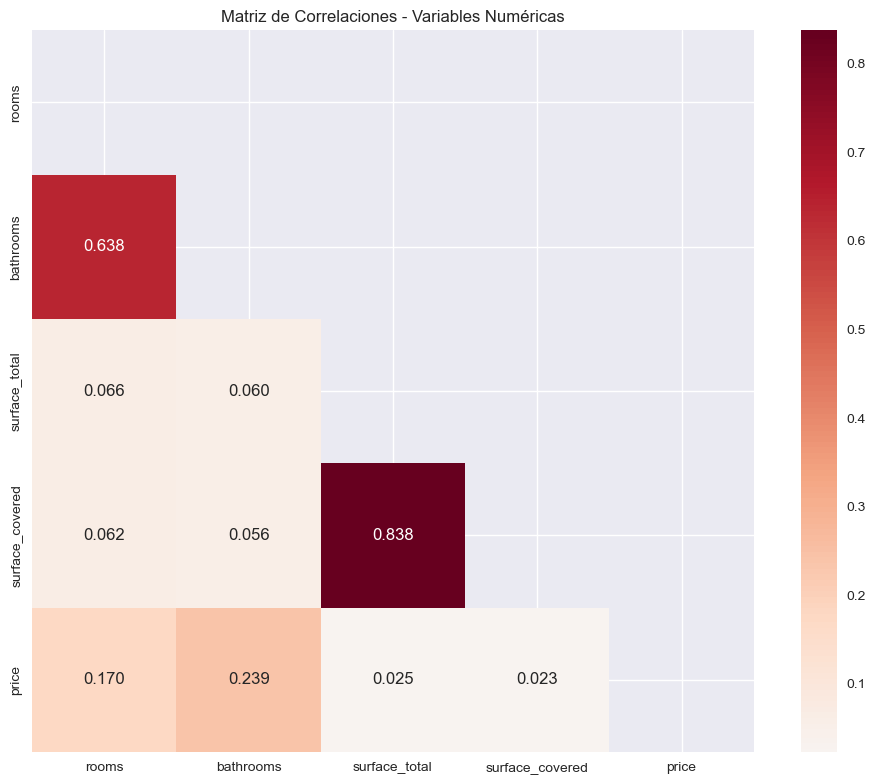

🔍 CORRELACIONES DESTACADAS:
Surface total vs covered: 0.838
Rooms vs bathrooms: 0.638


In [4]:
# Variables numéricas excluyendo coordenadas geográficas
vars_numericas = [col for col in numericas if col not in ['lat', 'lon']]
df_corr = df_train[vars_numericas]

# Calcular matriz de correlaciones
correlacion = df_corr.corr()

# Visualización
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, annot=True, cmap='RdBu_r', center=0, 
            mask=mask, square=True, fmt='.3f')
plt.title('Matriz de Correlaciones - Variables Numéricas')
plt.tight_layout()
plt.show()

# Correlaciones relevantes
print("🔍 CORRELACIONES DESTACADAS:")
print(f"Surface total vs covered: {correlacion.loc['surface_total', 'surface_covered']:.3f}")
print(f"Rooms vs bathrooms: {correlacion.loc['rooms', 'bathrooms']:.3f}")

### 2.2 Correlación con Variable Objetivo (Price)

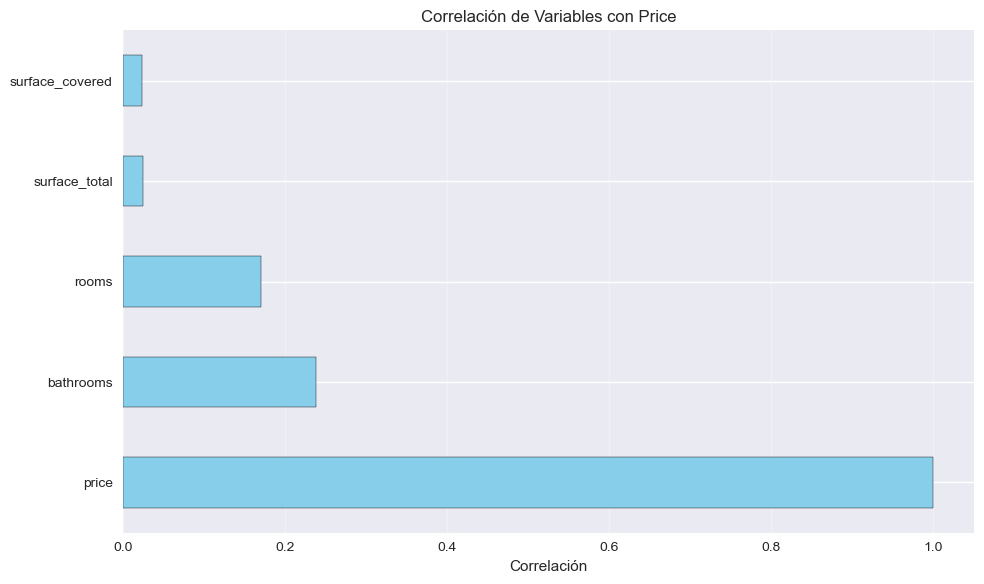

🎯 CORRELACIONES CON PRICE:
price          :  1.000
bathrooms      :  0.239
rooms          :  0.170
surface_total  :  0.025
surface_covered:  0.023


In [5]:
# Correlaciones con price
corr_price = df_corr.corrwith(df_train['price']).sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
corr_price.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Correlación de Variables con Price')
plt.xlabel('Correlación')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("🎯 CORRELACIONES CON PRICE:")
for var, corr in corr_price.items():
    print(f"{var:15}: {corr:6.3f}")

## 💰 3. Análisis de la Variable Objetivo (Price)

### 3.1 Estadísticas Descriptivas

📊 ESTADÍSTICAS DESCRIPTIVAS DE PRICE
Promedio:     $   282,819
Mediana:      $   160,000
Desv. Std:    $   739,711
Mínimo:       $     2,170
Máximo:       $111,555,000
Q1:           $   109,100
Q3:           $   260,900
Rango IQR:    $   151,800


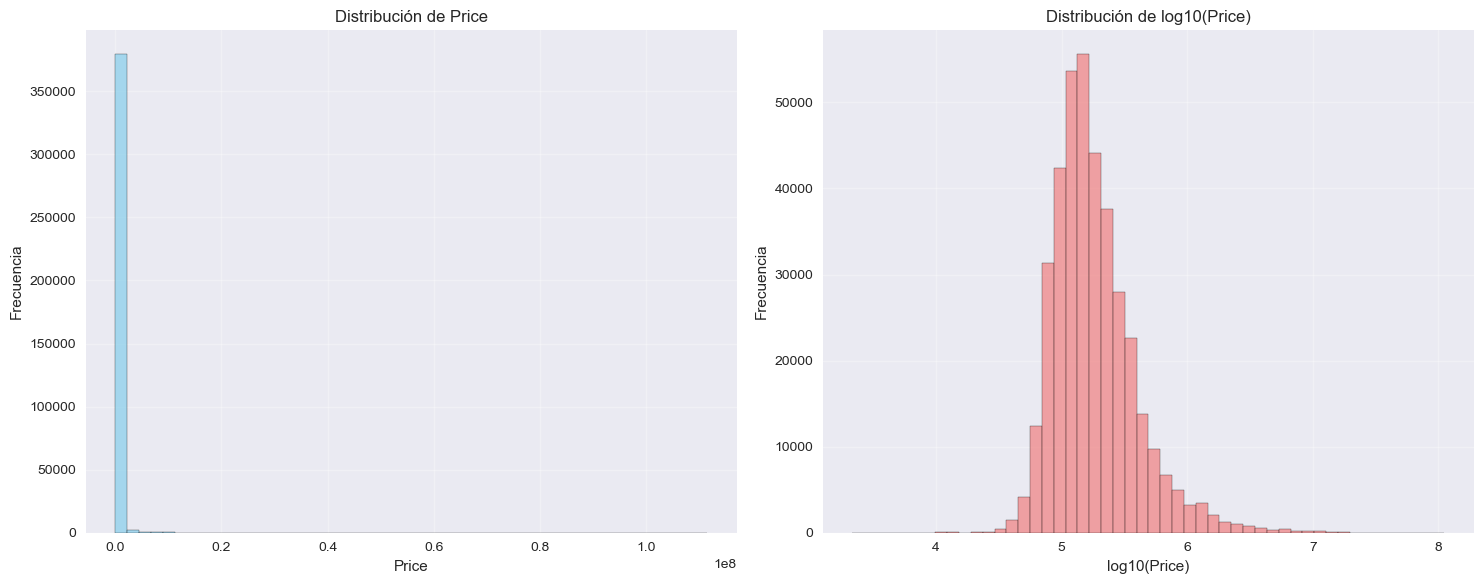

In [6]:
# Estadísticas descriptivas
price_stats = df_train['price'].describe()

print("📊 ESTADÍSTICAS DESCRIPTIVAS DE PRICE")
print("=" * 45)
print(f"Promedio:     ${price_stats['mean']:10,.0f}")
print(f"Mediana:      ${price_stats['50%']:10,.0f}")
print(f"Desv. Std:    ${price_stats['std']:10,.0f}")
print(f"Mínimo:       ${price_stats['min']:10,.0f}")
print(f"Máximo:       ${price_stats['max']:10,.0f}")
print(f"Q1:           ${price_stats['25%']:10,.0f}")
print(f"Q3:           ${price_stats['75%']:10,.0f}")
print(f"Rango IQR:    ${price_stats['75%'] - price_stats['25%']:10,.0f}")

# Histogramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribución normal
axes[0].hist(df_train['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(alpha=0.3)

# Distribución logarítmica
axes[1].hist(np.log10(df_train['price']), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribución de log10(Price)')
axes[1].set_xlabel('log10(Price)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 3.2 Análisis por Tipo de Propiedad

📊 ESTADÍSTICAS POR TIPO DE PROPIEDAD


,count,mean,median,std,min,max
prop_type,,,,,,
Casa,14389,420852.0,320000.0,452548.0,10000,12000000
Casa de campo,10,299500.0,197500.0,233863.0,85000,820000
Cochera,38,158729.0,24000.0,408571.0,9900,1600000
Departamento,326391,284428.0,154000.0,787853.0,2170,111555000
Depósito,68,479906.0,315000.0,789117.0,63000,6500000
Local comercial,1407,520575.0,280000.0,1040041.0,7000,25000000
Lote,544,501736.0,390000.0,442355.0,11111,4300000
Oficina,4671,246587.0,157750.0,427442.0,11111,11111111
Otro,588,529021.0,378500.0,573470.0,5000,6653528


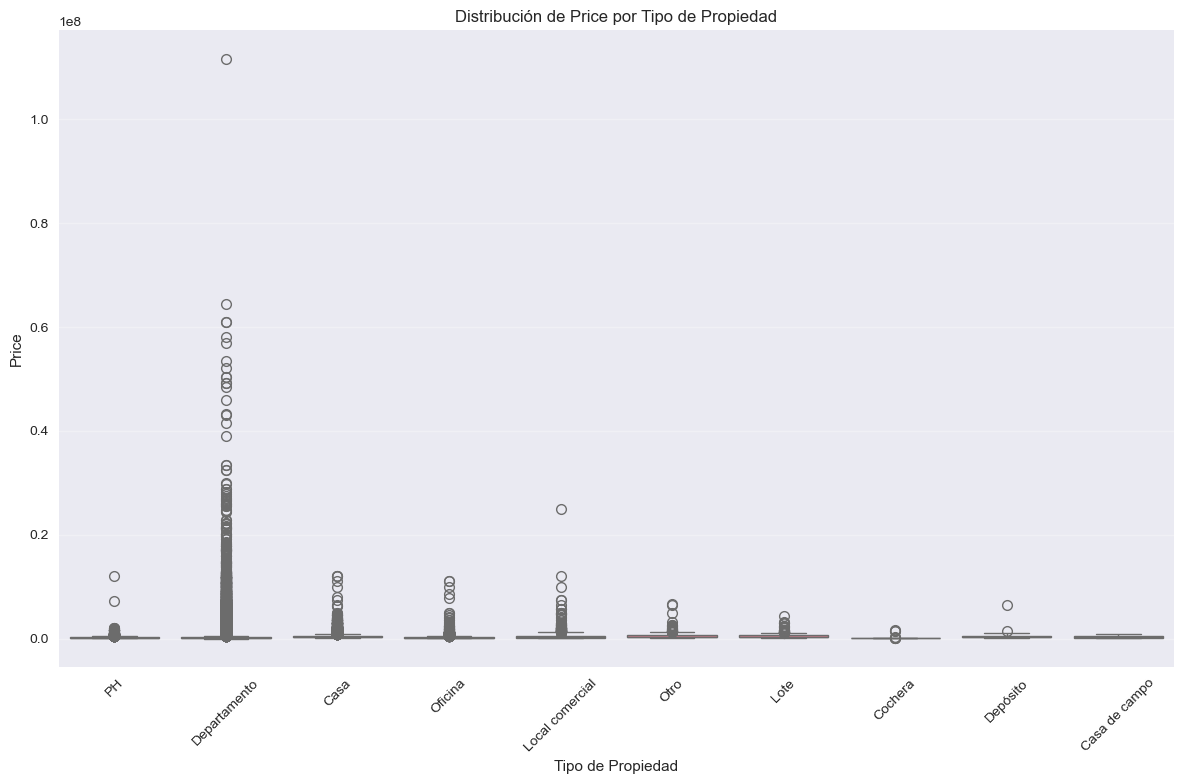

In [7]:
# Estadísticas por tipo de propiedad
price_by_type = df_train.groupby('prop_type')['price'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)

print("📊 ESTADÍSTICAS POR TIPO DE PROPIEDAD")
print("=" * 60)
display(price_by_type)

# Visualización con boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, x='prop_type', y='price')
plt.title('Distribución de Price por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Relación Price vs Surface Total

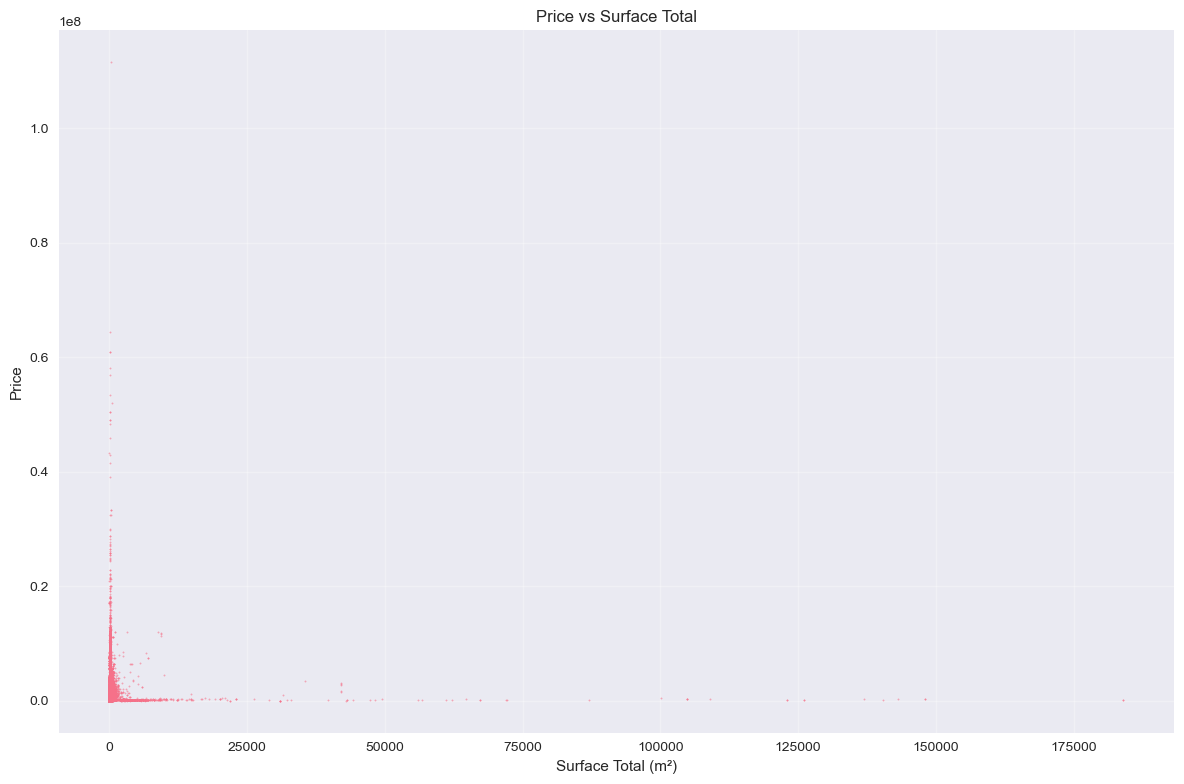

🚨 ANÁLISIS DE VALORES EXTREMOS

📈 Top 5 precios más altos:


,price,surface_total,rooms,prop_type
103608,111555000,226,4.0,Departamento
79860,64442264,126,4.0,Departamento
369635,61002177,126,4.0,Departamento
197146,61002000,125,4.0,Departamento
264470,58142705,149,4.0,Departamento



📐 Top 5 superficies más grandes:


,price,surface_total,rooms,prop_type
123033,185000,184000,5.0,PH
156776,185000,184000,5.0,PH
116727,289000,148000,4.0,Departamento
290856,289000,148000,4.0,Departamento
302330,250000,143136,3.0,Casa



💰 Top 5 precios más bajos:


,price,surface_total,rooms,prop_type
94191,2170,83,2.0,Departamento
50284,5000,194,4.0,Departamento
198524,5000,312,7.0,Departamento
307097,5000,455,7.0,Departamento
339645,5000,198,4.0,Departamento


In [8]:
# Scatterplot precio vs superficie
plt.figure(figsize=(12, 8))
plt.scatter(df_train['surface_total'], df_train['price'], alpha=0.5, s=1)
plt.title('Price vs Surface Total')
plt.xlabel('Surface Total (m²)')
plt.ylabel('Price')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar valores extremos
print("🚨 ANÁLISIS DE VALORES EXTREMOS")
print("=" * 40)
print("\n📈 Top 5 precios más altos:")
display(df_train.nlargest(5, 'price')[['price', 'surface_total', 'rooms', 'prop_type']])

print("\n📐 Top 5 superficies más grandes:")
display(df_train.nlargest(5, 'surface_total')[['price', 'surface_total', 'rooms', 'prop_type']])

print("\n💰 Top 5 precios más bajos:")
display(df_train.nsmallest(5, 'price')[['price', 'surface_total', 'rooms', 'prop_type']])

## 🎯 4. Detección y Tratamiento de Outliers

### 4.1 Detección de Outliers (Método IQR)

In [9]:
def detect_outliers_iqr(data, column):
    """
    Detecta outliers usando el método del Rango Intercuartílico (IQR).
    
    Parameters:
    -----------
    data : DataFrame
        Dataset a analizar
    column : str
        Nombre de la columna a analizar
    
    Returns:
    --------
    outliers : DataFrame
        Registros identificados como outliers
    lower_bound : float
        Límite inferior para valores normales
    upper_bound : float
        Límite superior para valores normales
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Variables a analizar para outliers
variables_outliers = ['price', 'rooms', 'surface_total']

print("🔍 DETECCIÓN DE OUTLIERS (Método IQR)")
print("=" * 50)

# Crear copia para trabajar
df_clean = df_train.copy()
total_original = len(df_clean)
outliers_summary = []

for var in variables_outliers:
    outliers, lower, upper = detect_outliers_iqr(df_clean, var)
    
    outliers_info = {
        'Variable': var,
        'Límite_Inf': f"{lower:,.0f}",
        'Límite_Sup': f"{upper:,.0f}",
        'Outliers': len(outliers),
        'Porcentaje': f"{len(outliers)/len(df_clean)*100:.2f}%"
    }
    outliers_summary.append(outliers_info)
    
    # Eliminar outliers
    if len(outliers) > 0:
        df_clean = df_clean[(df_clean[var] >= lower) & (df_clean[var] <= upper)]

# Mostrar resumen de outliers
outliers_df = pd.DataFrame(outliers_summary)
display(outliers_df)

total_final = len(df_clean)
print(f"\n📋 RESUMEN DEL FILTRADO:")
print(f"Registros originales: {total_original:,}")
print(f"Registros finales:    {total_final:,}")
print(f"Eliminados:           {total_original - total_final:,} ({(total_original - total_final)/total_original*100:.2f}%)")

# Guardar dataset limpio
df_train_filtered = df_clean.copy()
print(f"\n✅ Dataset filtrado creado exitosamente")

🔍 DETECCIÓN DE OUTLIERS (Método IQR)


,Variable,Límite_Inf,Límite_Sup,Outliers,Porcentaje
0,price,"-118,600","488,600",36055,9.41%
1,rooms,0,4,19268,5.55%
2,surface_total,-20,148,16008,4.89%



📋 RESUMEN DEL FILTRADO:
Registros originales: 382,991
Registros finales:    311,660
Eliminados:           71,331 (18.62%)

✅ Dataset filtrado creado exitosamente


### 4.2 Evaluación del Impacto del Filtrado

📊 COMPARACIÓN ESTADÍSTICA


,Original,Filtrado
Precio Promedio,"$282,819","$160,807"
Precio Mediana,"$160,000","$139,100"
Desv. Estándar,"$739,711","$83,071"
Superficie Promedio,107.9 m²,64.0 m²
Ambientes Promedio,2.8,2.4


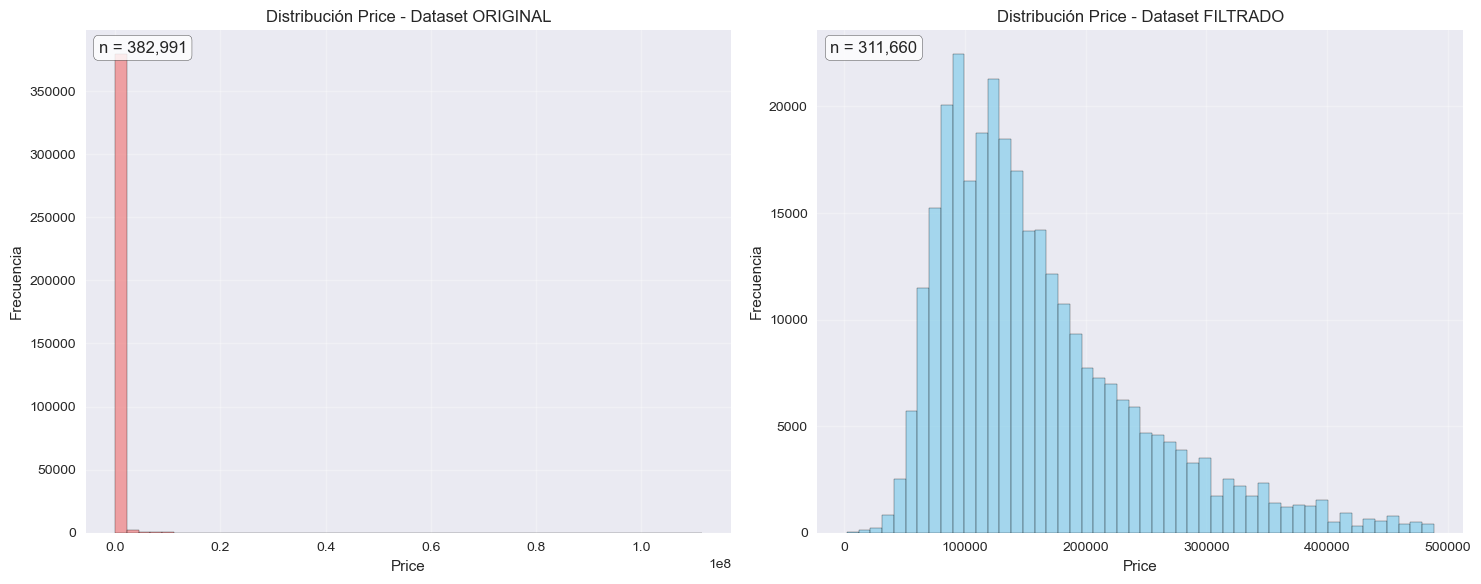

In [10]:
# Comparación estadística antes vs después
comparison = pd.DataFrame({
    'Original': [
        f"${df_train['price'].mean():,.0f}",
        f"${df_train['price'].median():,.0f}",
        f"${df_train['price'].std():,.0f}",
        f"{df_train['surface_total'].mean():.1f} m²",
        f"{df_train['rooms'].mean():.1f}"
    ],
    'Filtrado': [
        f"${df_train_filtered['price'].mean():,.0f}",
        f"${df_train_filtered['price'].median():,.0f}",
        f"${df_train_filtered['price'].std():,.0f}",
        f"{df_train_filtered['surface_total'].mean():.1f} m²",
        f"{df_train_filtered['rooms'].mean():.1f}"
    ]
}, index=['Precio Promedio', 'Precio Mediana', 'Desv. Estándar', 'Superficie Promedio', 'Ambientes Promedio'])

print("📊 COMPARACIÓN ESTADÍSTICA")
print("=" * 40)
display(comparison)

# Visualización comparativa de histogramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma original
axes[0].hist(df_train['price'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0].set_title('Distribución Price - Dataset ORIGINAL')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(alpha=0.3)
axes[0].text(0.02, 0.98, f'n = {len(df_train):,}', transform=axes[0].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Histograma filtrado
axes[1].hist(df_train_filtered['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_title('Distribución Price - Dataset FILTRADO')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(alpha=0.3)
axes[1].text(0.02, 0.98, f'n = {len(df_train_filtered):,}', transform=axes[1].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

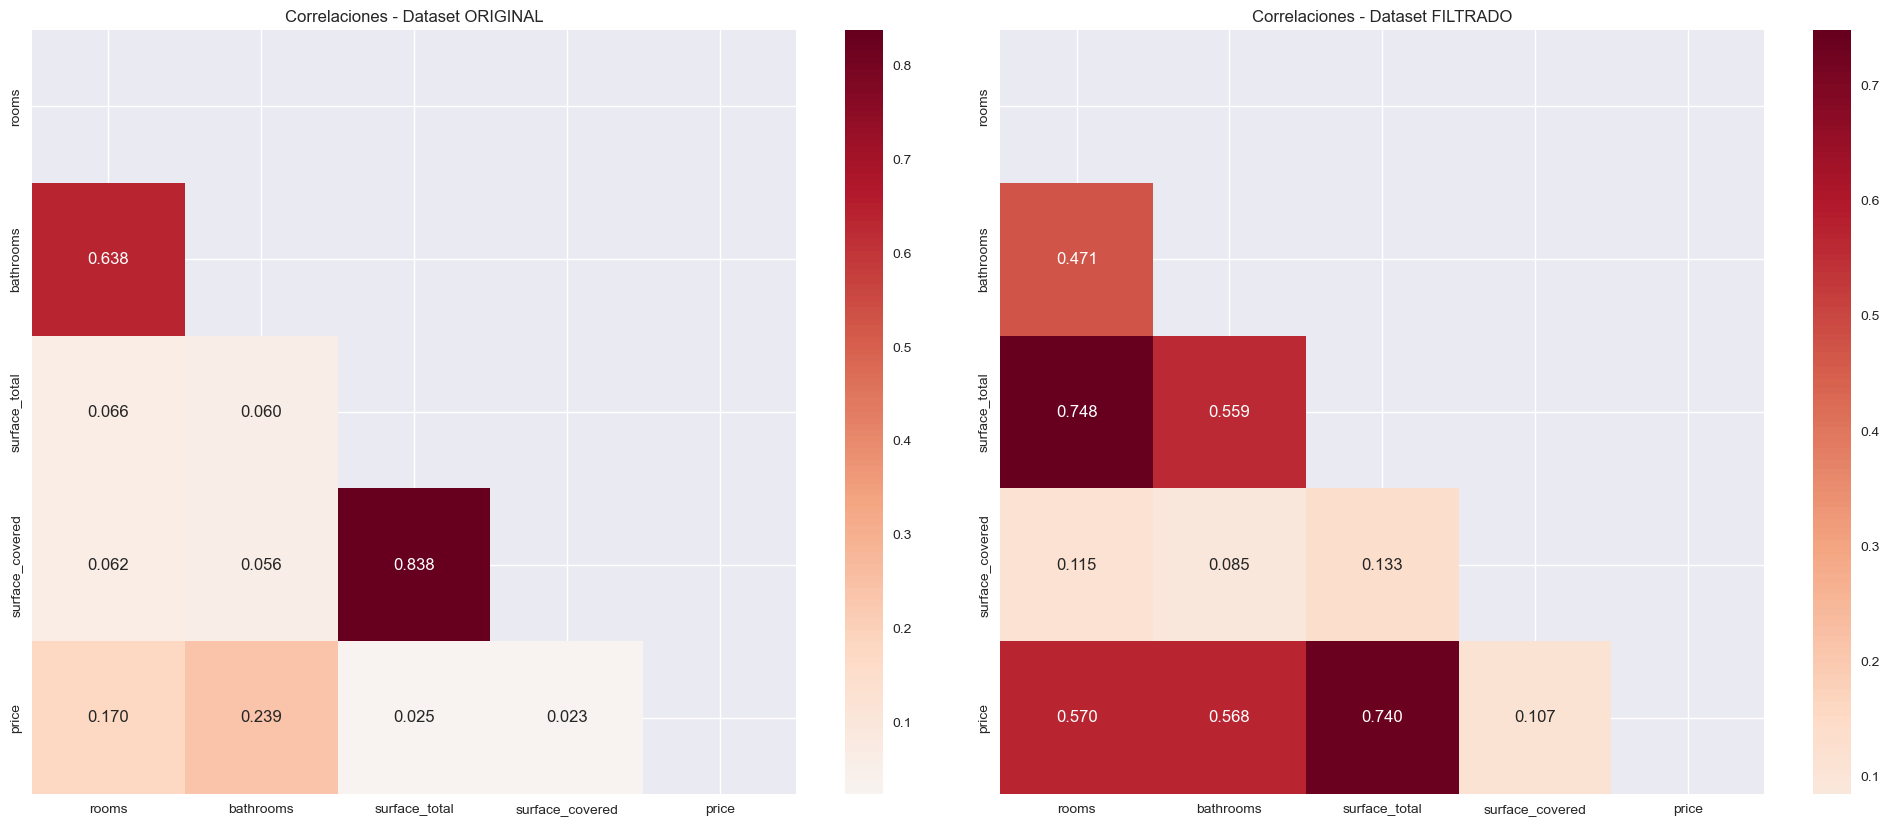

🔍 CAMBIOS EN CORRELACIONES CLAVE
surface_total vs surface_covered:
  Original:  0.838
  Filtrado:  0.133
  Cambio:    -0.705

rooms vs bathrooms:
  Original:  0.638
  Filtrado:  0.471
  Cambio:    -0.166



In [11]:
# Comparación de matrices de correlación
vars_numericas_filtered = [col for col in df_train_filtered.select_dtypes(include=[np.number]).columns 
                          if col not in ['lat', 'lon']]

df_corr_original = df_train[vars_numericas]
df_corr_filtered = df_train_filtered[vars_numericas_filtered]

correlacion_original = df_corr_original.corr()
correlacion_filtered = df_corr_filtered.corr()

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Matriz original
mask = np.triu(np.ones_like(correlacion_original, dtype=bool))
sns.heatmap(correlacion_original, annot=True, cmap='RdBu_r', center=0, 
            mask=mask, square=True, fmt='.3f', ax=axes[0])
axes[0].set_title('Correlaciones - Dataset ORIGINAL')

# Matriz filtrada
mask_filtered = np.triu(np.ones_like(correlacion_filtered, dtype=bool))
sns.heatmap(correlacion_filtered, annot=True, cmap='RdBu_r', center=0, 
            mask=mask_filtered, square=True, fmt='.3f', ax=axes[1])
axes[1].set_title('Correlaciones - Dataset FILTRADO')

plt.tight_layout()
plt.show()

# Análisis de cambios en correlaciones
print("🔍 CAMBIOS EN CORRELACIONES CLAVE")
print("=" * 50)

key_correlations = [
    ('surface_total', 'surface_covered'),
    ('rooms', 'bathrooms')
]

for var1, var2 in key_correlations:
    orig = correlacion_original.loc[var1, var2]
    filt = correlacion_filtered.loc[var1, var2]
    change = filt - orig
    
    print(f"{var1} vs {var2}:")
    print(f"  Original:  {orig:.3f}")
    print(f"  Filtrado:  {filt:.3f}")
    print(f"  Cambio:    {change:+.3f}")
    print()

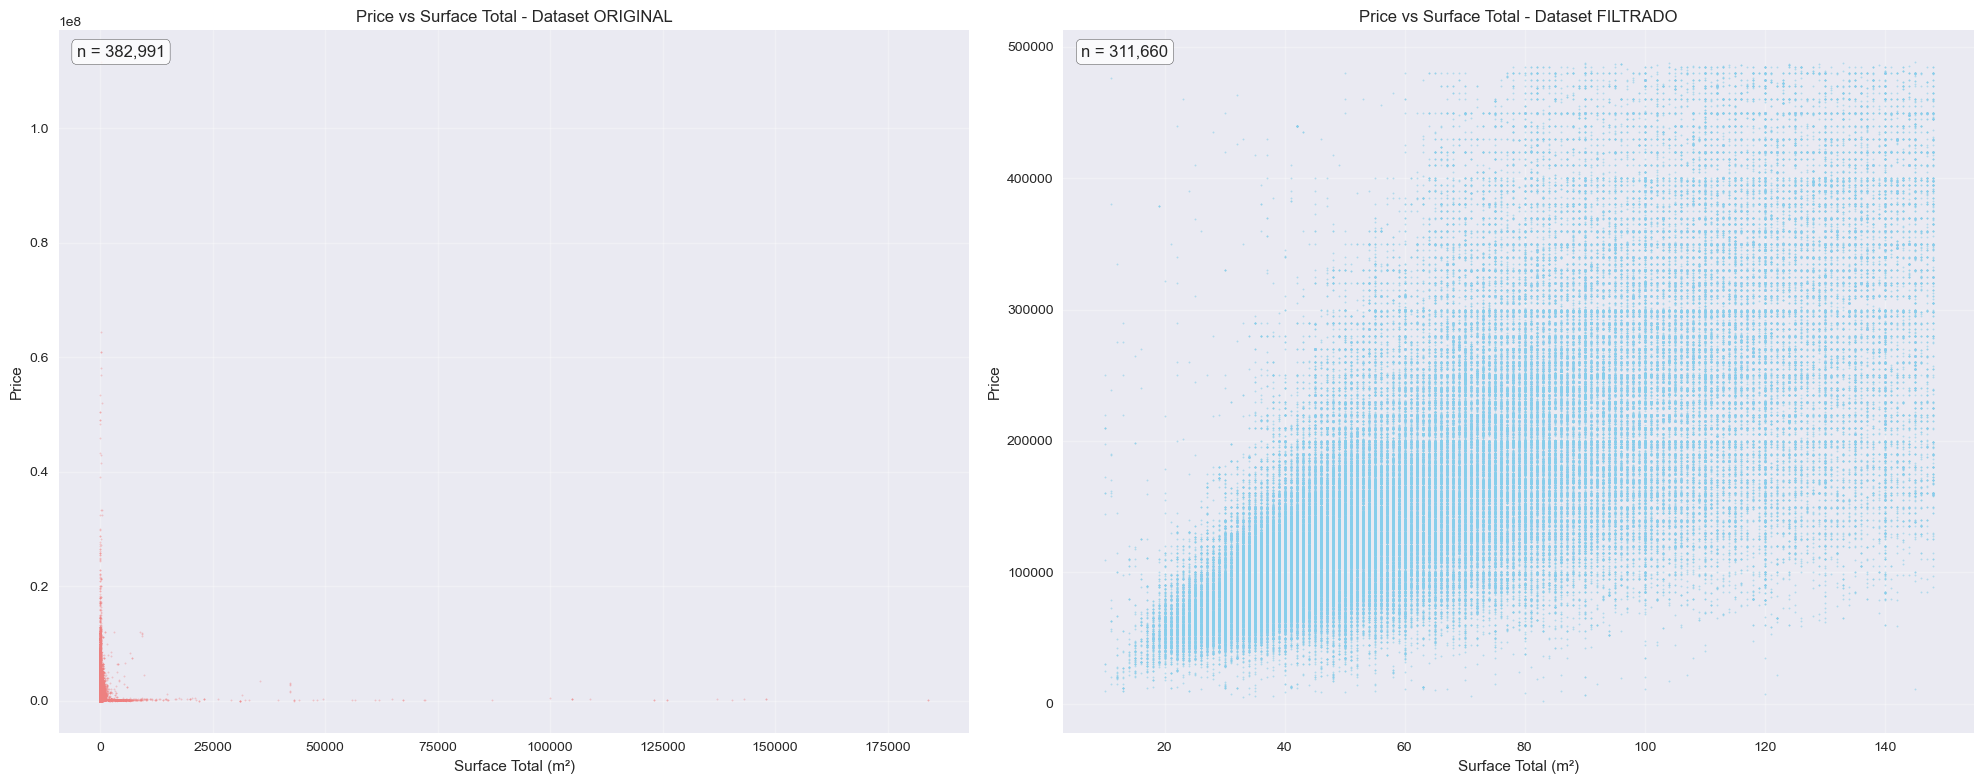

📊 ANÁLISIS COMPARATIVO DE SCATTERPLOTS
Dataset Original:
  Surface range: 10 - 184,000 m²
  Price range:   $2,170 - $111,555,000

Dataset Filtrado:
  Surface range: 10 - 148 m²
  Price range:   $2,170 - $488,274

💡 Observaciones:
  ✅ Eliminación exitosa de valores extremos atípicos
  ✅ Relación price-surface más clara y modelable
  ✅ Preservación de la estructura fundamental de los datos


In [12]:
# Comparación de scatterplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatterplot original
axes[0].scatter(df_train['surface_total'], df_train['price'], alpha=0.3, s=1, color='lightcoral')
axes[0].set_title('Price vs Surface Total - Dataset ORIGINAL')
axes[0].set_xlabel('Surface Total (m²)')
axes[0].set_ylabel('Price')
axes[0].grid(alpha=0.3)
axes[0].text(0.02, 0.98, f'n = {len(df_train):,}', transform=axes[0].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Scatterplot filtrado
axes[1].scatter(df_train_filtered['surface_total'], df_train_filtered['price'], 
                alpha=0.5, s=1, color='skyblue')
axes[1].set_title('Price vs Surface Total - Dataset FILTRADO')
axes[1].set_xlabel('Surface Total (m²)')
axes[1].set_ylabel('Price')
axes[1].grid(alpha=0.3)
axes[1].text(0.02, 0.98, f'n = {len(df_train_filtered):,}', transform=axes[1].transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 ANÁLISIS COMPARATIVO DE SCATTERPLOTS")
print("=" * 50)
print("Dataset Original:")
print(f"  Surface range: {df_train['surface_total'].min():,.0f} - {df_train['surface_total'].max():,.0f} m²")
print(f"  Price range:   ${df_train['price'].min():,.0f} - ${df_train['price'].max():,.0f}")

print("\nDataset Filtrado:")
print(f"  Surface range: {df_train_filtered['surface_total'].min():,.0f} - {df_train_filtered['surface_total'].max():,.0f} m²")
print(f"  Price range:   ${df_train_filtered['price'].min():,.0f} - ${df_train_filtered['price'].max():,.0f}")

print("\n💡 Observaciones:")
print("  ✅ Eliminación exitosa de valores extremos atípicos")
print("  ✅ Relación price-surface más clara y modelable")
print("  ✅ Preservación de la estructura fundamental de los datos")

## 🛠️ 5. Optimización de Variables Temporales

In [13]:
print("🔧 OPTIMIZACIÓN DE VARIABLES TEMPORALES")
print("=" * 50)

# Convertir created_on a datetime si es necesario
if df_train_filtered['created_on'].dtype == 'object':
    print("⏳ Convirtiendo created_on a datetime...")
    df_train_filtered['created_on'] = pd.to_datetime(df_train_filtered['created_on'])
    print("✅ Conversión completada")

# Crear componentes temporales eficientes
print("🛠️ Extrayendo componentes temporales...")
df_train_filtered['created_year'] = df_train_filtered['created_on'].dt.year
df_train_filtered['created_month'] = df_train_filtered['created_on'].dt.month  
df_train_filtered['created_quarter'] = df_train_filtered['created_on'].dt.quarter
df_train_filtered['created_weekday'] = df_train_filtered['created_on'].dt.weekday

# Verificar componentes creados
temp_components = ['created_year', 'created_month', 'created_quarter', 'created_weekday']
temp_info = pd.DataFrame({
    'Componente': temp_components,
    'Valores Únicos': [df_train_filtered[col].nunique() for col in temp_components],
    'Rango': [f"{df_train_filtered[col].min()}-{df_train_filtered[col].max()}" for col in temp_components]
})

print("📊 Componentes temporales creados:")
display(temp_info)

# Eliminar columna original de fecha
print("🗑️ Eliminando columna original 'created_on'...")
df_train_filtered = df_train_filtered.drop('created_on', axis=1)

print(f"✅ Dataset optimizado: {df_train_filtered.shape[0]:,} filas × {df_train_filtered.shape[1]} columnas")

print(f"\n💡 BENEFICIOS DE LA OPTIMIZACIÓN:")
print("  • Reducción masiva de variables dummy (de ~2,500 a 4 componentes)")
print("  • Mayor eficiencia computacional para modelado")
print("  • Preservación de patrones temporales relevantes")

🔧 OPTIMIZACIÓN DE VARIABLES TEMPORALES
⏳ Convirtiendo created_on a datetime...
✅ Conversión completada
🛠️ Extrayendo componentes temporales...
📊 Componentes temporales creados:


,Componente,Valores Únicos,Rango
0,created_year,8,2015-2022
1,created_month,12,1-12
2,created_quarter,4,1-4
3,created_weekday,7,0-6


🗑️ Eliminando columna original 'created_on'...
✅ Dataset optimizado: 311,660 filas × 15 columnas

💡 BENEFICIOS DE LA OPTIMIZACIÓN:
  • Reducción masiva de variables dummy (de ~2,500 a 4 componentes)
  • Mayor eficiencia computacional para modelado
  • Preservación de patrones temporales relevantes


## 💾 6. Guardado del Dataset Final

In [14]:
# Guardar dataset final optimizado
print("💾 GUARDANDO DATASET FINAL OPTIMIZADO")
print("=" * 50)

df_train_filtered.to_csv('train_bi_2025_filtered.csv', index=False)
print(f"✅ Dataset guardado como 'train_bi_2025_filtered.csv'")

# Mostrar estructura final
numeric_cols = df_train_filtered.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_train_filtered.select_dtypes(include=['object']).columns.tolist()

final_info = pd.DataFrame({
    'Información': [
        f"{df_train_filtered.shape[0]:,}",
        f"{df_train_filtered.shape[1]}",
        f"{len(numeric_cols)}",
        f"{len(categorical_cols)}",
        f"{df_train_filtered.memory_usage(deep=True).sum() / 1024**2:.1f} MB"
    ]
}, index=['Filas', 'Columnas Total', 'Variables Numéricas', 'Variables Categóricas', 'Tamaño en Memoria'])

print("\n📋 ESTRUCTURA FINAL DEL DATASET:")
display(final_info)

print(f"\n🔢 Variables numéricas ({len(numeric_cols)}):")
print(f"   {numeric_cols}")

print(f"\n🏷️ Variables categóricas ({len(categorical_cols)}):")
print(f"   {categorical_cols}")

print(f"\n🎯 DATASET LISTO PARA:")
print("   • Notebook 02: Modelos Tradicionales (Regresión Lineal, LASSO)")
print("   • Notebook 03: Modelos ML (Random Forest, XGBoost, Redes Neuronales)")
print("   • Notebook 04: Modelos NLP (TF-IDF, Word2Vec, Análisis de Sentimientos)")

💾 GUARDANDO DATASET FINAL OPTIMIZADO
✅ Dataset guardado como 'train_bi_2025_filtered.csv'

📋 ESTRUCTURA FINAL DEL DATASET:


,Información
Filas,"311,660"
Columnas Total,15
Variables Numéricas,11
Variables Categóricas,4
Tamaño en Memoria,375.4 MB



🔢 Variables numéricas (11):
   ['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'created_year', 'created_month', 'created_quarter', 'created_weekday']

🏷️ Variables categóricas (4):
   ['l2', 'l3', 'prop_type', 'description']

🎯 DATASET LISTO PARA:
   • Notebook 02: Modelos Tradicionales (Regresión Lineal, LASSO)
   • Notebook 03: Modelos ML (Random Forest, XGBoost, Redes Neuronales)
   • Notebook 04: Modelos NLP (TF-IDF, Word2Vec, Análisis de Sentimientos)
